In [3]:
import numpy as np
from scipy.stats import *
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
# 산술
print(np.mean(x))
# 조화
print(len(x) / np.sum(1/x))
print(hmean(x))

0.3
0.21897810218978103
0.21897810218978103


In [4]:
#절사 평균
income = np.random.normal(2000000, 500000, 100)
income = np.append(income, 10**9)
print(np.mean(income))

11879797.282175252


In [5]:
trim_mean(income, 0.2) # [20% ~ 80%]

1994347.014684018

In [6]:
x = np.random.choice(['A', 'B', 'C'], 1000) 
mode(x)

ModeResult(mode=array(['C'], dtype='<U1'), count=array([353]))

In [8]:
import pandas as pd
pd.Series(x).value_counts().index[0]

'C'

변동 계수

In [9]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = x1 * 10

print(np.std(x1, ddof = 1))
print(np.std(x2, ddof = 1))

print(variation(x1)) 
print(variation(x2))

1.5811388300841898
15.811388300841896
0.47140452079103173
0.4714045207910317


스케일링

In [10]:
X = pd.DataFrame({"X1":[1, 2, 3, 4, 5],
    "X2": [10, 20, 30, 40, 50]})

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 인스턴스화
Z = scaler.fit_transform(X) # fit_transform => ndarray
pd.DataFrame(Z)

,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


범위와 사분위 범위 계산

In [12]:
x = np.random.normal(100, 20, size = 1000)
print(np.ptp(x))
print(np.max(x) - np.min(x))
print(iqr(x))
print(np.quantile(x, 0.75) - np.quantile(x, 0.25))

122.20148799721242
122.20148799721242
27.06962752761561
27.06962752761561


왜도 계산

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

<AxesSubplot:>

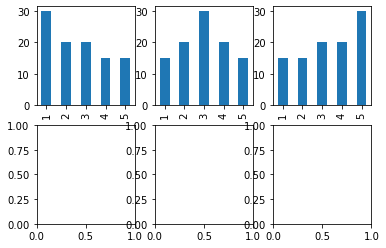

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3)
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar',ax=axes[0,0])
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar',ax=axes[0,1])
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar',ax=axes[0,2])

In [15]:
print("좌로 치우쳤을 때 왜도:", skew(x1))
print("치우치지 않았을 때 왜도:", skew(x2))
print("우로 치우친 왜도:", skew(x3))

좌로 치우쳤을 때 왜도: 0.3192801008486361
치우치지 않았을 때 왜도: 0.0
우로 치우친 왜도: -0.31928010084863606


첨도 계산

<AxesSubplot:>

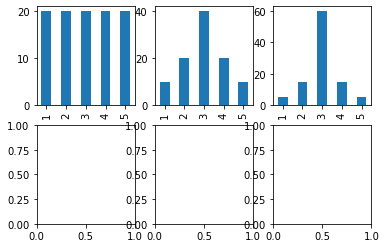

In [26]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

fig, axes = plt.subplots(nrows=2, ncols=3)
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar',ax=axes[0,0])
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar',ax=axes[0,1])
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar',ax=axes[0,2])

In [27]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", kurtosis(x1))
print("조금 뾰족할 때 첨도:", kurtosis(x2))
print("매우 뾰족할 때 첨도:", kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636
